In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
calendar = pd.read_csv('/content/drive/Airbnb/calendar.csv.gz')
print('We have', calendar.date.nunique(), 'days and', calendar.listing_id.nunique(), 'unique listings in the calendar data.')

We have 365 days and 49056 unique listings in the calendar data.


In [7]:
calendar.sort_values("date", ascending=True)

,listing_id,date,available,price
8952719,17073870,2018-12-06,f,NaN
6002794,11514862,2018-12-06,t,$75.00
6002605,11400327,2018-12-06,f,NaN
6002364,11470210,2018-12-06,f,NaN
6002031,11514756,2018-12-06,f,NaN
6001590,11398674,2018-12-06,f,NaN
6001400,11462944,2018-12-06,f,NaN
6000815,11514023,2018-12-06,f,NaN
6000363,11397187,2018-12-06,f,NaN
6000162,11513480,2018-12-06,f,NaN


In [8]:
calendar.date.min(), calendar.date.max()

('2018-12-06', '2019-12-05')

In [9]:
calendar.available.value_counts()

f    11753451
t     6151989
Name: available, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


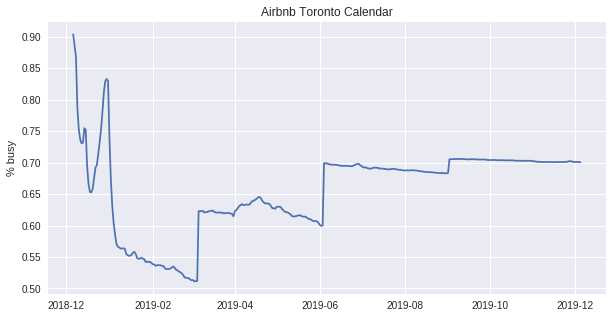

In [10]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])
plt.figure(figsize=(10, 5))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Airbnb Toronto Calendar')
plt.ylabel('% busy')
plt.show();

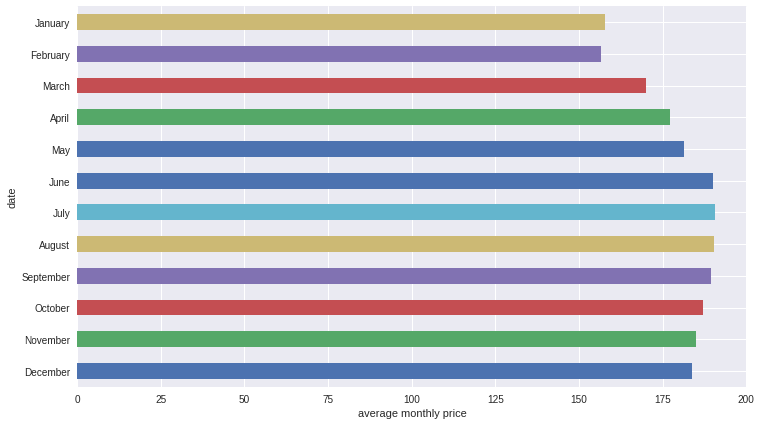

In [8]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (12,7))
plt.xlabel('average monthly price');

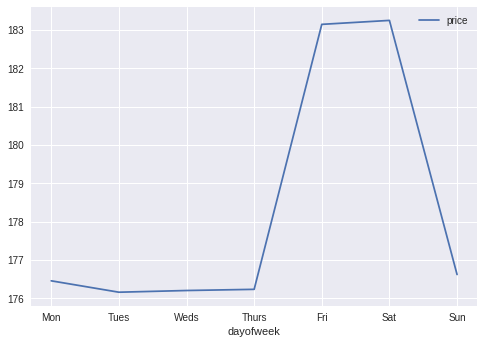

In [9]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.drop('listing_id', axis=1, inplace=True)
price_week.plot()
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Mon Tues Weds Thurs Fri Sat Sun".split()
plt.xticks(ticks, labels);

In [10]:
listings = pd.read_csv('/content/drive/Airbnb/listings.csv.gz')
print('We have', listings.id.nunique(), 'listings in the listing data.')

We have 49056 listings in the listing data.


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
neighbourhood_cleansed,
Williamsburg,4103
Bedford-Stuyvesant,3569
Harlem,2745
Bushwick,2407
Hell's Kitchen,2076
Upper West Side,2066
East Village,1992
Upper East Side,1906
Midtown,1658


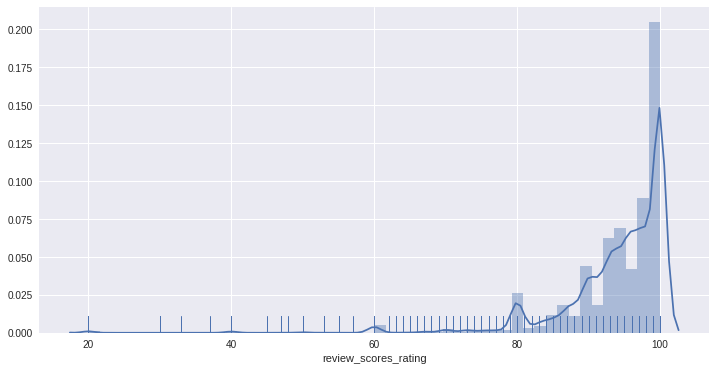

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(listings.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();

In [16]:
listings.review_scores_rating.describe()

count    37746.000000
mean        93.882027
std          8.167403
min         20.000000
25%         91.000000
50%         96.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [11]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings['price'].describe()

count    49056.000000
mean       152.330031
std        227.887173
min          0.000000
25%         70.000000
50%        110.000000
75%        179.000000
max      10000.000000
Name: price, dtype: float64

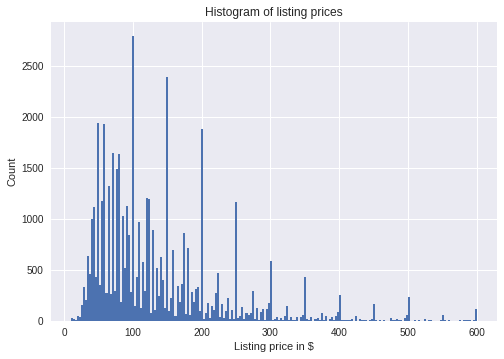

In [18]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].price.hist(bins=200)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


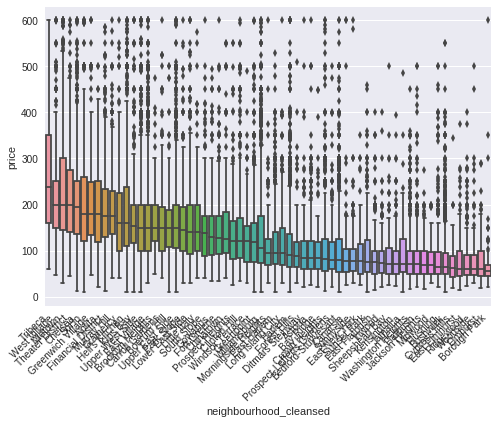

In [54]:
select_neighbourhood_over_100 = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('neighbourhood_cleansed')\
                    .filter(lambda x: len(x)>=100)\
                    ["neighbourhood_cleansed"].values

listings_neighbourhood_over_100 = listings.loc[listings["neighbourhood_cleansed"].map(lambda x: x in select_neighbourhood_over_100)]

sort_price = listings_neighbourhood_over_100.loc[(listings_neighbourhood_over_100.price <= 600) & (listings_neighbourhood_over_100.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index

sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings_neighbourhood_over_100.loc[(listings_neighbourhood_over_100.price <= 600) & (listings_neighbourhood_over_100.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

sns.boxplot(y='price', x='neighbourhood_cleansed', data=ccc.loc[(ccc.price <= 600) & (ccc.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


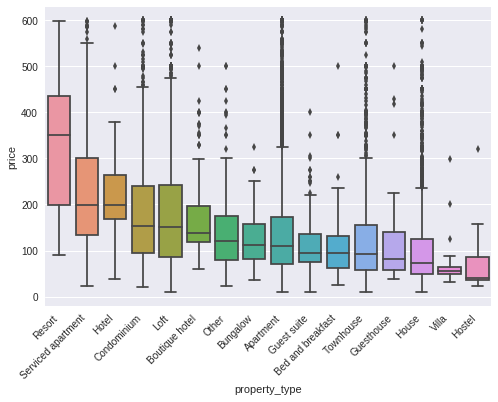

In [57]:
select_property_over_100 = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('property_type')\
                    .filter(lambda x: len(x)>=20)\
                    ["property_type"].values

listings_property_over_100 = listings.loc[listings["property_type"].map(lambda x: x in select_property_over_100)]

sort_price = listings_property_over_100.loc[(listings_property_over_100.price <= 600) & (listings_property_over_100.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings_property_over_100.loc[(listings_property_over_100.price <= 600) & (listings_property_over_100.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

In [51]:
(pd.Series(select_property_over_100) == "Resort").value_counts()

False    48196
True        63
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


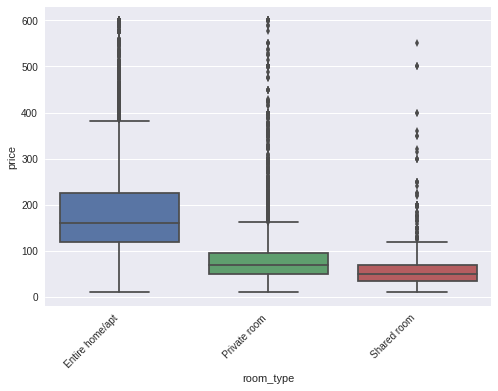

In [0]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

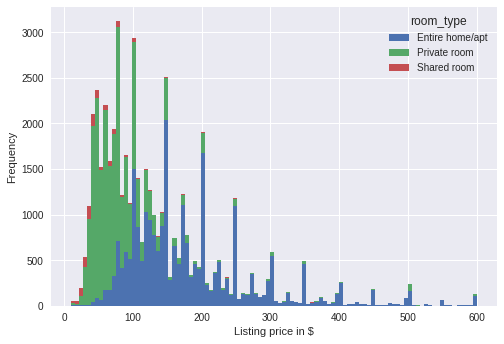

In [0]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


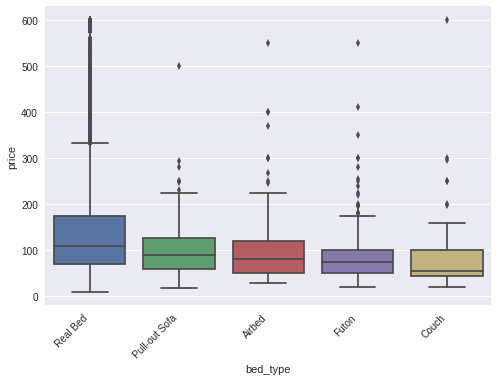

In [0]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('bed_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='bed_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

In [0]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")
listings['amenities'].head()

0    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
1    TV,Internet,Wifi,Air conditioning,Kitchen,Buzz...
2    TV,Cable TV,Internet,Wifi,Wheelchair accessibl...
3    TV,Wifi,Air conditioning,Kitchen,Paid parking ...
4    TV,Internet,Wifi,Air conditioning,Kitchen,Elev...
Name: amenities, dtype: object

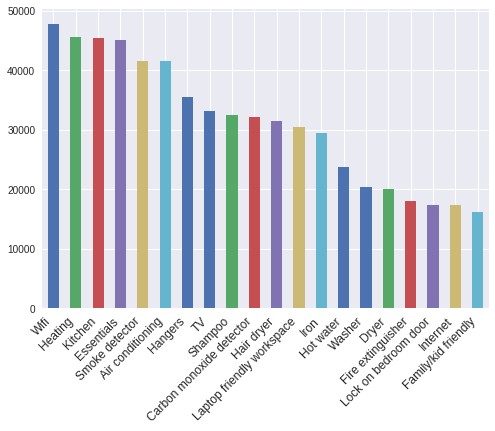

In [0]:
#リスト同士を結合
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

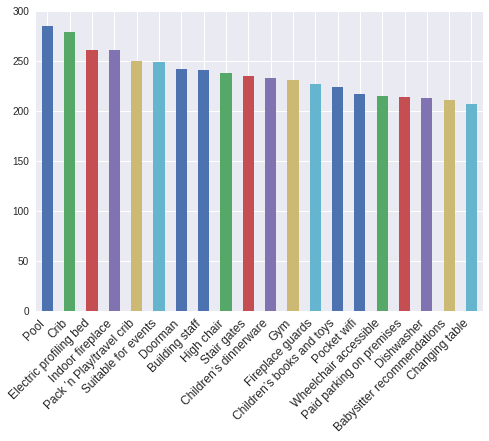

In [0]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])
amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();

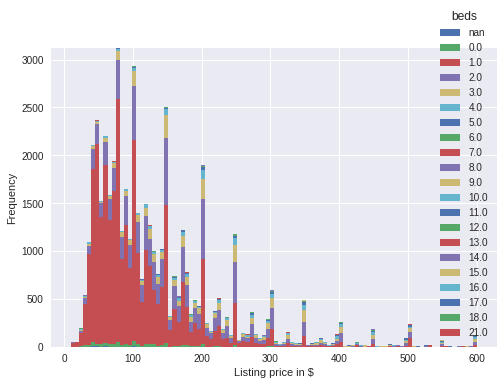

In [0]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=100)
plt.xlabel('Listing price in $');

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


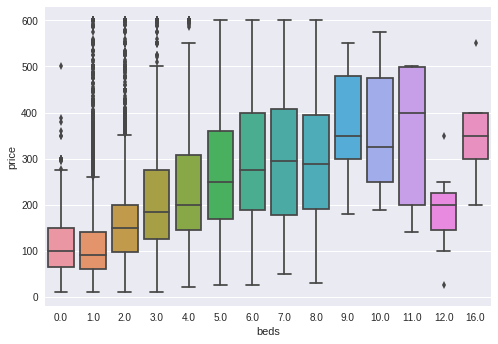

In [95]:
select_beds_over_5 = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('beds')\
                    .filter(lambda x: len(x)>=5)\
                    ["beds"].values

listings_beds_over_5 = listings.loc[listings["beds"].map(lambda x: x in select_beds_over_5)]

sns.boxplot(y='price', x='beds', data = listings_beds_over_5.loc[(listings_beds_over_5.price <= 600) & (listings_beds_over_5.price > 0)])
plt.show();

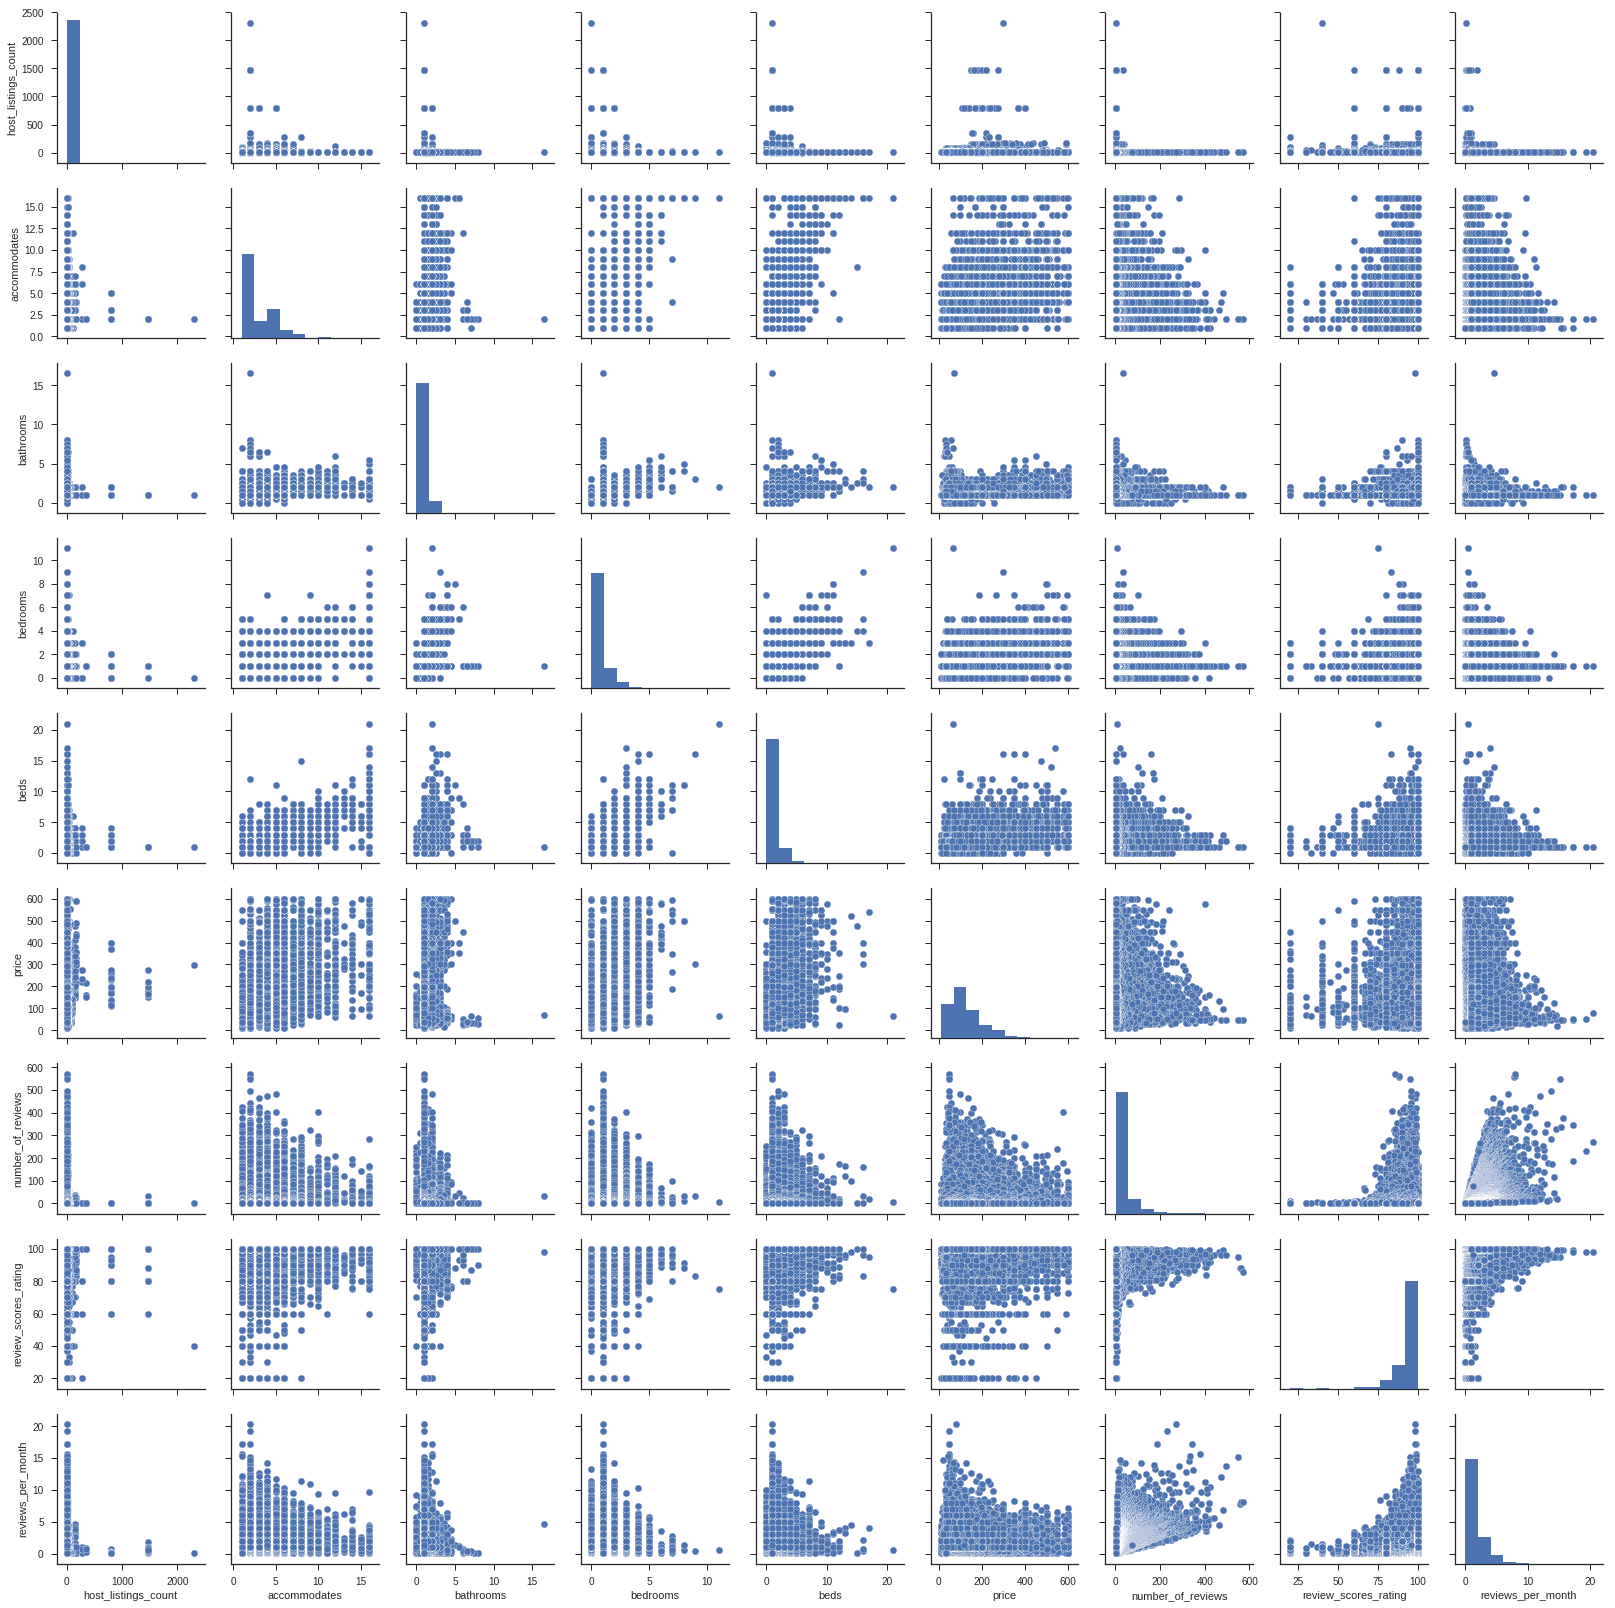

In [0]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
sns.set(style="ticks", color_codes=True)
sns.pairplot(listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna())
plt.show();

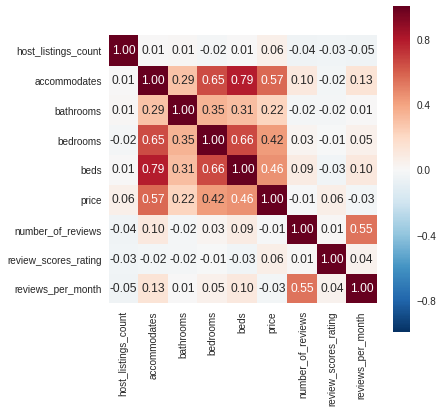

In [0]:
#accommodatesは収容人数
corr = listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

In [0]:
listings = listings.loc[(listings.price <= 600) & (listings.price > 0)]

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")
## テキスト内の単語の出現頻度を数えて、結果を素性ベクトル化する(Bag of words)
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(listings['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

In [0]:
columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
for c in columns:
    listings[c] = listings[c].replace('f',0,regex=True)
    listings[c] = listings[c].replace('t',1,regex=True)

In [0]:
listings['security_deposit'] = listings['security_deposit'].fillna(value=0)
listings['security_deposit'] = listings['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(value=0)
listings['cleaning_fee'] = listings['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float)

In [0]:
listings_new = listings[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]


In [0]:
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
for cat_feature in ['zipcode', 'property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings[cat_feature])], axis=1)

In [0]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 57.186
R^2 test: 0.627


In [0]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
246,Entire home/apt,0.297177
13,bathrooms,0.099605
9,cleaning_fee,0.068866
12,minimum_nights,0.027105
14,bedrooms,0.026613
16,number_of_reviews,0.025477
383,Midtown,0.022576
8,security_deposit,0.019843
17,review_scores_rating,0.015807
15,guests_included,0.015371


In [0]:
from lightgbm import LGBMRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }
        
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')
        
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

Training until validation scores don't improve for 20 rounds.
[100]	valid's rmse: 68.9908
[200]	valid's rmse: 62.2894
[300]	valid's rmse: 59.0555
[400]	valid's rmse: 57.3311
[500]	valid's rmse: 56.4069
[600]	valid's rmse: 55.835
[700]	valid's rmse: 55.4639
[800]	valid's rmse: 55.2013
[900]	valid's rmse: 55.0084
[1000]	valid's rmse: 54.8582
Did not meet early stopping. Best iteration is:
[1000]	valid's rmse: 54.8582
R^2 test: 0.657


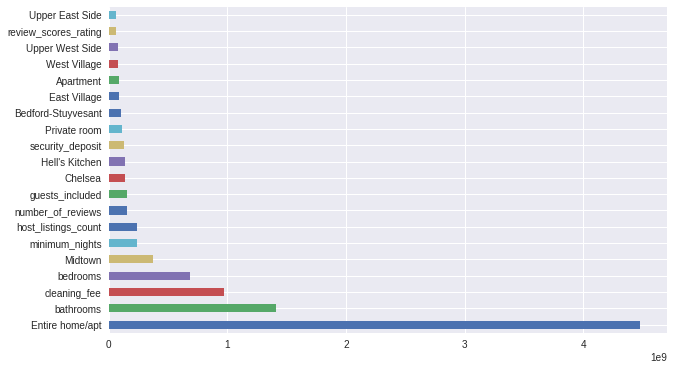

In [0]:
feat_imp = pd.Series(clf.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))